In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import cv2
import os

In [2]:
rm -r '../content/sample_data'

In [28]:
! pip install -q kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nandakishorv","key":"bb4930d058b5380fec9550f9b064564e"}'}

In [30]:
! mkdir ~.kaggle

In [35]:
! cp kaggle.json ~/.kaggle/

In [36]:
! chmod 600 ~/.kaggle/kaggle.json

In [37]:
! kaggle competitions download -c fungiclef2022

100% 8.72G/8.73G [02:01<00:00, 170MB/s]
100% 8.73G/8.73G [02:01<00:00, 77.1MB/s]


In [38]:
! unzip fungiclef2022.zip

Streaming output truncated to the last 5000 lines.
  inflating: DF21-images-300/DF21_300/4-3052906308.JPG  
  inflating: DF21-images-300/DF21_300/4-3052906323.JPG  
  inflating: DF21-images-300/DF21_300/4-3052907309.JPG  
  inflating: DF21-images-300/DF21_300/4-3052907312.JPG  
  inflating: DF21-images-300/DF21_300/4-3052908303.JPG  
  inflating: DF21-images-300/DF21_300/4-3052910309.JPG  
  inflating: DF21-images-300/DF21_300/4-3052910342.JPG  
  inflating: DF21-images-300/DF21_300/4-3052910345.JPG  
  inflating: DF21-images-300/DF21_300/4-3052911303.JPG  
  inflating: DF21-images-300/DF21_300/4-3052911327.JPG  
  inflating: DF21-images-300/DF21_300/4-3052911352.JPG  
  inflating: DF21-images-300/DF21_300/4-3052912326.JPG  
  inflating: DF21-images-300/DF21_300/4-3052912336.JPG  
  inflating: DF21-images-300/DF21_300/4-3052913304.JPG  
  inflating: DF21-images-300/DF21_300/4-3052913329.JPG  
  inflating: DF21-images-300/DF21_300/4-3052914301.JPG  
  inflating: DF21-images-300/DF21_300

**image segregation**

In [39]:
df = pd.read_csv(r'../content/DF20-train_metadata.csv')
df.head()

,gbifID,eventDate,year,month,day,countryCode,locality,taxonID,scientificName,kingdom,...,level2Name,ImageUniqueID,Substrate,rightsHolder,Latitude,Longitude,CoorUncert,Habitat,image_path,class_id
0,2238546328,2018-04-16T00:00:00,2018.0,4.0,16.0,DK,Ulvedal Plantage,30872.0,Ramalina farinacea (L.) Ach.,Fungi,...,Viborg,2238546328-30620,bark of living trees,Ulfva Melchior Hvidegaard,56.299706,9.258110,50.0,Mixed woodland (with coniferous and deciduous ...,2238546328-30620.JPG,1273
1,2558871973,2020-01-03T00:00:00,2020.0,1.0,3.0,DK,Slotshegn,15256.0,Hysterium acuminatum Fr.,Fungi,...,Frederikssund,2558871973-53941,dead wood (including bark),Ole Martin,55.861899,11.975973,50.0,Deciduous woodland,2558871973-53941.JPG,708
2,2238503501,2017-08-22T00:00:00,2017.0,8.0,22.0,DK,Petersborg Strandenge,61200.0,Gliophorus perplexus (A.H.Sm. & Hesler) Kovalenko,Fungi,...,Vesthimmerland,2238503501-245559,soil,Per Taudal Poulsen,56.975158,9.285525,75.0,natural grassland,2238503501-245559.JPG,535
3,2446759075,2019-10-26T00:00:00,2019.0,10.0,26.0,DK,Klintebjerg,30530.0,Lecidella scabra (Taylor) Hertel & Leuckert,Fungi,...,Odsherred,2446759075-197643,stone,Susanne Rabenborg,55.960242,11.583103,15.0,gravel or clay pit,2446759075-197643.JPG,832
4,2238472345,2016-08-21T00:00:00,2016.0,8.0,21.0,DK,Blåbjerg,63728.0,"Russula fragilis Fr., 1838",Fungi,...,Varde,2238472345-167057,soil,Tom Smidth,55.742985,8.250188,50.0,Mixed woodland (with coniferous and deciduous ...,2238472345-167057.JPG,1338


In [40]:
def imgopen(img_name):
  img = cv2.imread('../content/DF20-300px/DF20_300/'+img_name)
  img= cv2.resize(img,(150,150))
  return img

In [41]:
for index, row in df.iterrows():
  if row[33]==0 or row[33]==1 or row[33]==2 or row[33]==3 or row[33]==4 or row[33]==5 or row[33]==6 or row[33]==7 or row[33]==8 or row[33]==9:
    cv2.imwrite('../content/drive/MyDrive/train2/'+row[32].lower(),imgopen(row[32].lower()))

In [59]:
c=0
for img in os.listdir('../content/drive/MyDrive/train2'):
  c+=1
print(c)

1775


**Data frame**

In [4]:
df1 = pd.read_csv(r'../content/drive/MyDrive/miniclass/train_dataset.csv')
df1.head()

,gbifID,species,image_path,class_id
0,2238476564,Abortiporus biennis,2238476564-93258.JPG,0
1,2984618340,Abortiporus biennis,2984618340-220602.JPG,0
2,2238424107,Abortiporus biennis,2238424107-313477.JPG,0
3,2421821274,Abortiporus biennis,2421821274-119046.JPG,0
4,2238479506,Abortiporus biennis,2238479506-241917.JPG,0


In [5]:
filename=[]
category=[]

for index, row in df1.iterrows():
    category.append(str(row[3]))
    filename.append(row[2].lower())
df2=pd.DataFrame({
    'filename':filename,
    'class':category,
})


 Total images : 1765


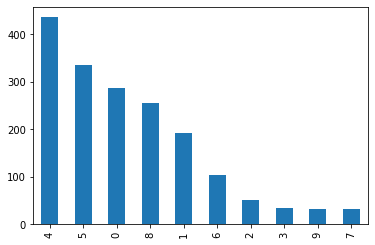

In [6]:
df2['class'].value_counts().plot.bar()
print("\n Total images :",df1.shape[0])

**Model creation**

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [22]:
model3=Sequential()

model3.add(Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model3.add(MaxPooling2D(pool_size=(3,3)))
model3.add(Dropout(0.25))
model3.add(Conv2D(32,(3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(3,3)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64,(3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(3,3)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64,(3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(196,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=["accuracy"])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 49, 49, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 32)       

In [51]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [52]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                           patience=5,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)
callbacks= [earlystop, learning_rate_reduction]

In [53]:
from keras.callbacks import ModelCheckpoint

In [54]:
filepath='/content/drive/MyDrive/miniclass/m3.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list=[checkpoint]

**Train-Validate split**

4    351
5    265
0    225
8    202
1    164
6     87
2     35
7     30
9     28
3     25
Name: class, dtype: int64

 Total train images:  1412


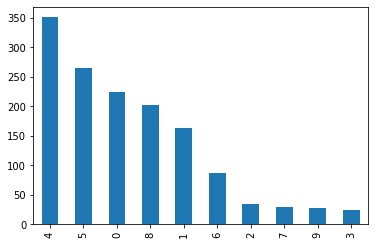

In [55]:
train_df, validate_df = train_test_split(df2, test_size=0.20, random_state=0)

train_df = train_df.reset_index(drop=True)
train_df['class'].value_counts().plot.bar()
print(train_df['class'].value_counts())
print("\n Total train images: ",train_df.shape[0])

4    85
5    71
0    63
8    54
1    28
6    18
2    17
3    10
9     5
7     2
Name: class, dtype: int64

 Total validate integer:  353


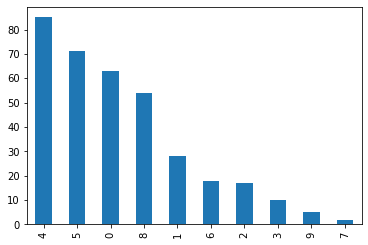

In [56]:
validate_df = validate_df.reset_index(drop=True)
validate_df['class'].value_counts().plot.bar()
print(validate_df['class'].value_counts())
print("\n Total validate integer: ", validate_df.shape[0])

In [57]:
if train_df['filename'][0:600] is validate_df['filename']:
    print("Same")
else:
    print("False")

False


In [58]:
total_train = train_df.shape[0]
print("Total train images:", total_train)
total_validate = validate_df.shape[0]
print("Total validate images:", total_validate)

Total train images: 1412
Total validate images: 353


**Data Generator**

In [64]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                  rescale=1./255,
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(train_df,'../content/drive/MyDrive/train2/',x_col='filename',y_col='class',target_size=(150,150),class_mode='categorical',batch_size=32)

validation_generator = validation_datagen.flow_from_dataframe(validate_df,'../content/drive/MyDrive/train2/',x_col='filename',y_col='class',target_size=(150,150),class_mode='categorical',batch_size=32)

Found 1412 validated image filenames belonging to 10 classes.
Found 353 validated image filenames belonging to 10 classes.


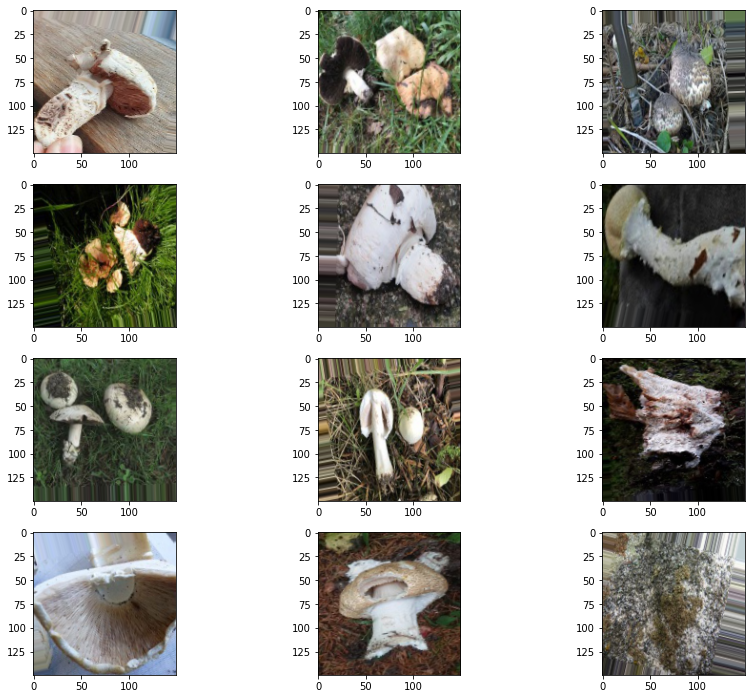

In [65]:
plt.figure(figsize=(12,12))
for i in range(0,12):
    plt.subplot(5,3,i+1)
    for X_batch, Y_batch in train_generator:
        image= X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [24]:
epochs=50
batch_size=64

history = model3.fit(
train_generator,
epochs=epochs,
validation_data=validation_generator,
validation_steps=total_validate/batch_size,
steps_per_epoch=total_train/batch_size,
callbacks=callbacks_list
)

Epoch 1/50
23/22 [===============================] - ETA: 0s - loss: 1.6474 - accuracy: 0.3978
Epoch 1: val_accuracy improved from 0.36979 to 0.40104, saving model to /content/drive/MyDrive/miniclass/m2.hdf5
22/22 [==============================] - 17s 755ms/step - loss: 1.6474 - accuracy: 0.3978 - val_loss: 1.7161 - val_accuracy: 0.4010
Epoch 2/50
23/22 [===============================] - ETA: 0s - loss: 1.5956 - accuracy: 0.3978
Epoch 2: val_accuracy did not improve from 0.40104
22/22 [==============================] - 16s 738ms/step - loss: 1.5956 - accuracy: 0.3978 - val_loss: 1.7326 - val_accuracy: 0.3698
Epoch 3/50
23/22 [===============================] - ETA: 0s - loss: 1.5501 - accuracy: 0.4332
Epoch 3: val_accuracy did not improve from 0.40104
22/22 [==============================] - 16s 732ms/step - loss: 1.5501 - accuracy: 0.4332 - val_loss: 1.6960 - val_accuracy: 0.4010
Epoch 4/50
23/22 [===============================] - ETA: 0s - loss: 1.6035 - accuracy: 0.4155
Epoch 4: 

**Prediction**

In [181]:
test_filenames = os.listdir('../content/drive/MyDrive/test')
test_df=pd.DataFrame({
    'filename':test_filenames
})
total_test=test_df.shape[0]
print(total_test)

10


In [192]:
from tensorflow import keras
model3 = keras.models.load_model('../content/drive/MyDrive/miniclass/m2.hdf5')

In [182]:
test_datagen=ImageDataGenerator(rescale=1./255)
batch_size=100

test_generator=test_datagen.flow_from_dataframe(
    test_df,
    '../content/drive/MyDrive/test',
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(150,150),
    batch_size=batch_size,
    shuffle=False
)

Found 10 validated image filenames.


In [193]:
predict1=model3.predict(test_generator,steps=np.ceil(total_test/batch_size))
print(len(predict1))
print(predict1)

10
[[1.43877611e-01 2.20360141e-03 9.84948408e-03 1.48589686e-02
  1.27592117e-01 2.57626027e-01 8.17190632e-02 5.89123592e-02
  2.77931631e-01 2.54291128e-02]
 [8.47522989e-02 3.21259946e-02 5.92938699e-02 1.34811535e-01
  2.05507115e-01 1.55845717e-01 8.16836506e-02 7.57555962e-02
  1.35963097e-01 3.42610702e-02]
 [1.97196394e-01 3.29666800e-05 5.38091350e-04 2.31327163e-03
  5.56358695e-01 1.22423425e-01 6.16932437e-02 3.59138846e-03
  5.48708327e-02 9.81698977e-04]
 [8.95828754e-03 9.79099452e-01 8.03130213e-03 1.12355934e-04
  2.34014049e-04 1.40988827e-03 3.28492606e-04 1.84146629e-04
  1.10533391e-03 5.36812353e-04]
 [4.37904775e-01 2.15491350e-03 8.00261181e-03 6.89328322e-03
  1.34331375e-01 1.70277506e-01 1.01553373e-01 1.40067497e-02
  1.05248824e-01 1.96266342e-02]
 [1.29704297e-01 1.14511009e-02 2.61213090e-02 4.43163849e-02
  1.37498528e-01 2.19091505e-01 9.92482081e-02 7.49721006e-02
  2.15614289e-01 4.19822894e-02]
 [1.83452204e-01 2.18934901e-02 4.52703461e-02 3.780543

In [194]:
test_df['category']=np.argmax(predict1,axis=-1)
print(test_df)

                filename  category
0  2862690402-360952.jpg         8
1   2575119613-55228.jpg         4
2  2285836149-115545.jpg         4
3  2238529230-175869.jpg         1
4  2860297370-210546.jpg         0
5   2238208159-84435.jpg         5
6   2575122908-56107.jpg         5
7  2237955920-152533.jpg         5
8   2238331433-11840.jpg         4
9  2458347241-273666.jpg         0


In [9]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2

In [112]:
for index, row in train_df.iterrows():
    img=cv2.imread('../content/drive/MyDrive/train2/'+row[0])
    cv2.imwrite('../content/drive/MyDrive/train_path/'+row[0].lower(),img)

In [113]:
for index, row in validate_df.iterrows():
    img=cv2.imread('../content/drive/MyDrive/train2/'+row[0])
    cv2.imwrite('../content/drive/MyDrive/val_path/'+row[0].lower(),img)

In [94]:
x_train=[]
for index, row in train_df.iterrows():
    img=cv2.imread('../content/drive/MyDrive/train2/'+row[0])
    x_train.append(img)

In [95]:
x_val=[]
for index, row in validate_df.iterrows():
    img=cv2.imread('../content/drive/MyDrive/train2/'+row[0])
    x_val.append(img)

In [109]:
train_x=np.array(x_train)
val_x=np.array(x_val)

In [110]:
train_x=train_x/255.0
val_x=val_x/255.0

In [156]:
train_set = train_datagen.flow_from_dataframe(train_df,'../content/drive/MyDrive/train2/',x_col='filename',y_col='class',target_size=(150,150),class_mode='categorical',batch_size=32)

validation_set = validation_datagen.flow_from_dataframe(validate_df,'../content/drive/MyDrive/train2/',x_col='filename',y_col='class',target_size=(150,150),class_mode='categorical',batch_size=32)

Found 1412 validated image filenames belonging to 10 classes.
Found 353 validated image filenames belonging to 10 classes.


In [158]:
train_y=train_set.classes
val_y=validation_set.classes

In [161]:
train_y=np.array(train_y)
val_y=np.array(val_y)

In [162]:
train_y

array([4, 8, 4, ..., 8, 3, 4])

In [151]:
nsamples, nx, ny, nrgb = train_x.shape
x_train2 = train_x.reshape((nsamples,nx*ny*nrgb))

In [152]:
nsamples, nx, ny, nrgb = val_x.shape
x_test2 = val_x.reshape((nsamples,nx*ny*nrgb))

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
model=RandomForestClassifier()

In [164]:
model.fit(x_train2,train_y)

RandomForestClassifier()

In [165]:
y_pred=model.predict(x_test2)
y_pred

array([4, 4, 1, 5, 4, 4, 4, 5, 1, 5, 4, 4, 4, 4, 4, 1, 4, 4, 0, 5, 5, 4,
       0, 4, 1, 4, 5, 1, 5, 0, 5, 4, 4, 4, 5, 4, 1, 5, 5, 4, 4, 4, 1, 4,
       4, 4, 4, 8, 0, 5, 5, 5, 4, 4, 1, 4, 5, 4, 4, 4, 4, 4, 1, 4, 4, 8,
       1, 0, 5, 5, 4, 4, 5, 4, 4, 4, 1, 5, 1, 0, 0, 5, 0, 4, 5, 1, 4, 4,
       4, 4, 5, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 1, 5, 4, 4, 4, 5, 5, 4, 4,
       4, 4, 4, 4, 1, 0, 4, 8, 4, 4, 4, 4, 0, 4, 4, 6, 4, 5, 0, 5, 5, 1,
       5, 1, 4, 5, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 1, 0, 8, 5, 1, 5, 4, 1,
       1, 4, 5, 4, 0, 4, 5, 0, 1, 5, 4, 4, 4, 8, 4, 4, 1, 4, 1, 4, 1, 4,
       0, 4, 4, 4, 5, 1, 5, 1, 8, 5, 5, 4, 4, 4, 5, 4, 0, 5, 4, 5, 1, 1,
       4, 4, 0, 5, 4, 4, 5, 8, 4, 1, 8, 4, 4, 5, 5, 4, 1, 4, 4, 4, 4, 4,
       5, 4, 8, 5, 1, 5, 4, 5, 8, 4, 4, 1, 4, 4, 0, 4, 4, 1, 5, 4, 5, 1,
       4, 0, 4, 1, 4, 5, 4, 1, 1, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 0, 1,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 1, 4, 1, 0,
       5, 5, 4, 4, 4, 5, 4, 4, 0, 8, 8, 5, 4, 4, 5,

In [168]:
accuracy_score(y_pred,val_y)
print(classification_report(y_pred,val_y))

              precision    recall  f1-score   support

           0       0.17      0.33      0.23        33
           1       0.71      0.38      0.50        52
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.75      0.35      0.48       182
           5       0.21      0.21      0.21        72
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.09      0.38      0.15        13
           9       0.00      0.00      0.00         0

    accuracy                           0.33       353
   macro avg       0.19      0.17      0.16       353
weighted avg       0.56      0.33      0.39       353



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [195]:
predict=model3.predict(validation_set,steps=np.ceil(353/32))

In [196]:
y1_pred=np.argmax(predict,axis=-1)

In [197]:
y1_pred

array([0, 0, 0, 1, 8, 4, 1, 5, 4, 4, 0, 5, 4, 4, 5, 4, 5, 0, 4, 5, 0, 8,
       8, 5, 4, 4, 0, 1, 0, 4, 1, 8, 0, 0, 0, 5, 5, 1, 5, 4, 5, 1, 1, 1,
       1, 4, 0, 0, 4, 0, 4, 4, 0, 0, 5, 4, 8, 4, 0, 8, 1, 4, 4, 5, 4, 0,
       1, 4, 5, 8, 5, 0, 4, 5, 4, 0, 5, 0, 0, 4, 4, 4, 5, 5, 4, 1, 4, 1,
       0, 4, 5, 5, 0, 1, 4, 8, 1, 0, 4, 5, 5, 5, 1, 5, 4, 4, 0, 0, 5, 0,
       4, 4, 5, 5, 0, 0, 5, 4, 0, 4, 4, 4, 4, 0, 4, 4, 5, 4, 0, 0, 0, 4,
       5, 0, 4, 5, 4, 0, 4, 4, 1, 5, 5, 5, 0, 4, 1, 8, 5, 4, 0, 8, 8, 1,
       5, 4, 1, 5, 4, 4, 8, 1, 0, 4, 0, 8, 4, 0, 4, 0, 5, 0, 1, 5, 8, 5,
       4, 4, 4, 4, 4, 4, 8, 4, 0, 4, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4,
       0, 4, 1, 4, 5, 0, 4, 0, 0, 5, 0, 8, 4, 1, 4, 0, 0, 4, 0, 0, 0, 5,
       0, 4, 4, 1, 5, 5, 4, 4, 0, 4, 1, 0, 0, 5, 5, 5, 4, 4, 8, 0, 0, 4,
       5, 4, 8, 5, 5, 4, 0, 5, 5, 5, 4, 4, 0, 0, 4, 4, 4, 1, 0, 0, 1, 4,
       5, 4, 0, 1, 4, 1, 4, 0, 1, 8, 4, 1, 4, 0, 4, 0, 1, 0, 1, 1, 5, 4,
       1, 4, 4, 1, 4, 4, 1, 4, 0, 4, 4, 4, 0, 8, 8,

In [198]:
accuracy_score(y1_pred,val_y)
print(classification_report(y1_pred,val_y))

              precision    recall  f1-score   support

           0       0.25      0.18      0.21        91
           1       0.04      0.02      0.03        46
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.39      0.26      0.31       125
           5       0.10      0.10      0.10        67
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.06      0.12      0.08        24
           9       0.00      0.00      0.00         0

    accuracy                           0.17       353
   macro avg       0.08      0.07      0.07       353
weighted avg       0.23      0.17      0.19       353



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [199]:
from sklearn.neighbors import KNeighborsClassifier

In [226]:
knn=KNeighborsClassifier(n_neighbors=10)

In [227]:
knn.fit(x_train2,train_y)

KNeighborsClassifier(n_neighbors=10)

In [228]:
y_pred_knn=knn.predict(x_test2)
y_pred_knn

array([4, 5, 1, 8, 0, 1, 4, 5, 1, 5, 5, 4, 8, 5, 1, 1, 6, 4, 7, 5, 5, 0,
       1, 4, 1, 4, 4, 1, 0, 1, 0, 5, 5, 5, 4, 4, 4, 0, 2, 4, 2, 4, 1, 4,
       4, 4, 4, 4, 4, 1, 4, 4, 5, 5, 1, 4, 5, 4, 4, 0, 5, 3, 1, 0, 5, 7,
       1, 8, 4, 7, 4, 4, 0, 6, 4, 7, 1, 1, 1, 4, 4, 1, 1, 4, 7, 1, 1, 6,
       5, 4, 4, 4, 5, 4, 4, 5, 4, 4, 0, 4, 4, 1, 5, 0, 4, 4, 1, 8, 3, 4,
       4, 4, 4, 4, 1, 4, 4, 0, 1, 4, 4, 4, 4, 4, 4, 0, 0, 1, 4, 4, 4, 1,
       4, 1, 5, 5, 1, 4, 4, 1, 4, 4, 8, 4, 4, 0, 1, 5, 0, 4, 4, 5, 4, 1,
       1, 4, 5, 8, 0, 8, 4, 4, 1, 1, 4, 4, 4, 8, 8, 4, 1, 4, 1, 4, 1, 5,
       1, 0, 4, 4, 4, 1, 5, 1, 7, 1, 7, 0, 4, 5, 1, 4, 1, 5, 4, 4, 4, 1,
       4, 4, 4, 4, 8, 4, 4, 1, 1, 1, 2, 4, 4, 1, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 5, 4, 1, 8, 4, 0, 4, 4, 1, 5, 4, 4, 4, 4, 5, 1, 4, 0, 1,
       4, 1, 5, 4, 0, 0, 4, 4, 1, 1, 0, 4, 4, 4, 4, 4, 4, 2, 3, 4, 3, 4,
       6, 1, 6, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 5, 4, 4, 1, 8, 1, 4,
       1, 1, 4, 4, 1, 4, 8, 5, 1, 4, 2, 4, 4, 4, 1,

In [229]:
accuracy_score(y_pred_knn,val_y)
print(classification_report(y_pred_knn,val_y))

              precision    recall  f1-score   support

           0       0.11      0.23      0.15        30
           1       0.75      0.26      0.39        80
           2       0.18      0.50      0.26         6
           3       0.00      0.00      0.00         6
           4       0.65      0.34      0.45       162
           5       0.13      0.22      0.16        41
           6       0.06      0.17      0.08         6
           7       0.50      0.14      0.22         7
           8       0.09      0.33      0.14        15
           9       0.00      0.00      0.00         0

    accuracy                           0.29       353
   macro avg       0.25      0.22      0.19       353
weighted avg       0.51      0.29      0.34       353



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [204]:
from sklearn.tree import DecisionTreeClassifier

In [205]:
dtc=DecisionTreeClassifier()

In [230]:
dtc.fit(x_train2,train_y)

DecisionTreeClassifier()

In [231]:
y_pred_dtc=dtc.predict(x_test2)
y_pred_dtc

array([4, 0, 0, 3, 0, 2, 4, 5, 5, 4, 4, 4, 4, 0, 1, 5, 3, 6, 4, 5, 0, 4,
       3, 8, 4, 0, 0, 4, 0, 2, 4, 5, 4, 8, 5, 4, 5, 4, 0, 8, 4, 8, 5, 5,
       4, 4, 6, 8, 8, 1, 5, 6, 8, 0, 4, 5, 0, 0, 8, 4, 8, 8, 1, 5, 5, 0,
       0, 0, 6, 0, 6, 6, 5, 4, 0, 0, 0, 8, 1, 6, 8, 8, 4, 8, 0, 1, 0, 0,
       5, 4, 2, 5, 1, 6, 4, 5, 4, 0, 4, 4, 4, 1, 4, 5, 4, 5, 4, 4, 0, 6,
       4, 7, 8, 4, 1, 4, 8, 8, 8, 8, 8, 5, 8, 8, 5, 0, 4, 0, 8, 4, 6, 8,
       8, 4, 5, 7, 6, 1, 5, 1, 8, 5, 5, 4, 5, 4, 1, 8, 5, 8, 1, 5, 4, 5,
       4, 4, 4, 4, 2, 4, 9, 0, 6, 0, 1, 7, 5, 8, 8, 8, 0, 5, 8, 8, 1, 4,
       0, 4, 5, 0, 8, 8, 4, 1, 0, 4, 5, 0, 5, 8, 4, 4, 5, 5, 4, 6, 1, 4,
       5, 0, 5, 7, 8, 4, 4, 8, 1, 1, 8, 8, 0, 4, 5, 5, 1, 4, 5, 5, 4, 4,
       0, 5, 8, 0, 6, 6, 4, 5, 1, 0, 0, 1, 5, 4, 5, 9, 4, 0, 7, 9, 6, 1,
       3, 1, 0, 8, 0, 4, 4, 1, 1, 5, 7, 4, 4, 8, 4, 9, 9, 8, 5, 8, 8, 5,
       7, 1, 4, 0, 4, 4, 9, 4, 4, 6, 9, 8, 8, 8, 4, 9, 1, 4, 3, 4, 0, 0,
       1, 2, 5, 4, 4, 5, 5, 0, 4, 4, 4, 1, 6, 0, 8,

In [233]:
accuracy_score(y_pred_dtc,val_y)
print(classification_report(y_pred_dtc,val_y))

              precision    recall  f1-score   support

           0       0.19      0.22      0.20        55
           1       0.46      0.37      0.41        35
           2       0.06      0.20      0.09         5
           3       0.10      0.14      0.12         7
           4       0.34      0.32      0.33        92
           5       0.21      0.26      0.23        58
           6       0.06      0.05      0.05        21
           7       0.00      0.00      0.00         8
           8       0.30      0.25      0.27        63
           9       0.20      0.11      0.14         9

    accuracy                           0.25       353
   macro avg       0.19      0.19      0.19       353
weighted avg       0.26      0.25      0.26       353



In [234]:
from sklearn.naive_bayes import GaussianNB

In [235]:
nb=GaussianNB()

In [237]:
nb.fit(x_train2,train_y)

GaussianNB()

In [238]:
y_pred_nb=nb.predict(x_test2)
y_pred_nb

array([4, 0, 2, 3, 6, 5, 4, 5, 1, 5, 4, 6, 4, 4, 3, 1, 6, 3, 6, 5, 5, 6,
       1, 4, 1, 4, 5, 1, 5, 9, 8, 4, 5, 8, 3, 2, 1, 0, 9, 8, 2, 4, 1, 4,
       3, 6, 5, 5, 5, 3, 8, 5, 4, 4, 1, 0, 5, 4, 4, 4, 4, 5, 1, 4, 8, 5,
       1, 5, 5, 0, 3, 0, 8, 4, 3, 6, 1, 8, 1, 3, 0, 8, 2, 8, 9, 2, 2, 2,
       4, 4, 8, 4, 5, 4, 3, 4, 5, 6, 3, 4, 6, 2, 4, 6, 4, 4, 7, 4, 5, 0,
       3, 5, 4, 5, 2, 4, 4, 8, 5, 4, 4, 8, 4, 4, 4, 3, 8, 7, 6, 6, 6, 8,
       8, 1, 4, 5, 1, 8, 4, 2, 5, 4, 5, 8, 5, 4, 2, 5, 8, 5, 3, 4, 4, 2,
       1, 4, 4, 4, 2, 5, 0, 5, 2, 2, 2, 4, 4, 8, 4, 5, 1, 4, 1, 9, 1, 4,
       1, 9, 9, 4, 8, 1, 5, 1, 3, 0, 8, 4, 0, 4, 2, 4, 8, 5, 4, 5, 1, 1,
       1, 4, 3, 3, 4, 4, 8, 9, 1, 9, 9, 5, 4, 5, 5, 3, 1, 4, 4, 4, 4, 4,
       5, 3, 8, 8, 3, 9, 4, 8, 8, 3, 4, 1, 5, 4, 8, 0, 4, 1, 5, 3, 8, 1,
       9, 1, 4, 1, 4, 5, 4, 1, 2, 5, 5, 4, 5, 2, 5, 5, 9, 9, 5, 5, 4, 1,
       3, 1, 6, 8, 5, 2, 5, 4, 6, 4, 4, 5, 8, 0, 4, 4, 9, 9, 1, 3, 1, 0,
       9, 6, 5, 4, 1, 5, 4, 4, 3, 9, 8, 1, 4, 5, 1,

In [239]:
accuracy_score(y_pred_nb,val_y)
print(classification_report(y_pred_nb,val_y))

              precision    recall  f1-score   support

           0       0.13      0.57      0.21        14
           1       0.57      0.34      0.43        47
           2       0.35      0.26      0.30        23
           3       0.60      0.19      0.29        32
           4       0.46      0.40      0.43        97
           5       0.23      0.27      0.24        60
           6       0.06      0.05      0.05        19
           7       0.00      0.00      0.00         3
           8       0.13      0.22      0.16        32
           9       0.20      0.04      0.06        26

    accuracy                           0.28       353
   macro avg       0.27      0.23      0.22       353
weighted avg       0.35      0.28      0.29       353



In [240]:
test_datagen=ImageDataGenerator(rescale=1./255)
batch_size=100

test_generator=test_datagen.flow_from_dataframe(
    test_df,
    '../content/drive/MyDrive/test',
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(150,150),
    batch_size=batch_size,
    shuffle=False
)

Found 10 validated image filenames.


In [ ]:
y_pred=model.predict(test_generator)
y_pred